## Answers to Descriptive Questions

### What is Data Mining and its Relationship with Artificial Intelligence?
Data mining is the process of extracting insights from data using statistical methods and algorithms. It is a subset of artificial intelligence (AI), which aims to design automated systems that can perform intelligent tasks. Data mining uses machine learning algorithms to develop models that can make predictions based on patterns discovered in the data, aligning with the goal of AI.
### Explain Sample, Feature, and Label in a Dataset and their Differences?
- A sample is an individual observation or row within a dataset, which contains values for each feature.It is also referred to as a tuple or object.
- A feature is a column in the dataset that describes a specific attribute of each object, such as the "loan" or "education" columns in the bank marketing dataset.
- A label is a feature that we want to predict using the values of other features, such as the "deposit" feature in the dataset below.
### What are the types of features?
Features can be categorized into numerical, categorical, and binary types. Numerical features can be discrete or continuous, while categorical features can be nominal or ordinal. Binary features have only two possible values.


In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# df = df.drop('duration', axis=1)

In [ ]:
print('Shape of dataframe:', df.shape)

Shape of dataframe: (11162, 16)


### Show the number of samples, features, and labels in the selected dataset.


In [ ]:
features = df.columns

border = '🔸' * 20

print(f'{border}\n\u2728 Features \u2728\n{border}')
print('\n'.join(features))
print(f'\n{border}\nFeatures Count: {len(features)}\n{border}')

🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸
✨ Features ✨
🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸
age
job
marital
education
default
balance
housing
loan
contact
day
month
campaign
pdays
previous
poutcome
deposit

🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸
Features Count: 16
🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸


In [ ]:
samples_count = df.shape[0]

print(f'Samples Count: {samples_count}')

Samples Count: 11162


In [ ]:
print('Labels Count:')
df['deposit'].value_counts()

Labels Count:


deposit
no     5873
yes    5289
Name: count, dtype: int64

### Stats for numeric columns

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Stats for non-numeric columns

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=[int, float])
for col in non_numeric_cols:
    print(f"Statistics for column {col}:")
    print(df[col].value_counts())
    print(f"Mode: {df[col].mode().values[0]}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")
    print()

Statistics for column job:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
Mode: management
Number of unique values: 12
Unique values: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Statistics for column marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
Mode: married
Number of unique values: 3
Unique values: ['married' 'single' 'divorced']

Statistics for column education:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
Mode: secondary
Number of unique values: 4
Unique values: ['secondary' 'tertiary' 'primary' 'unknown']

Statistics for col

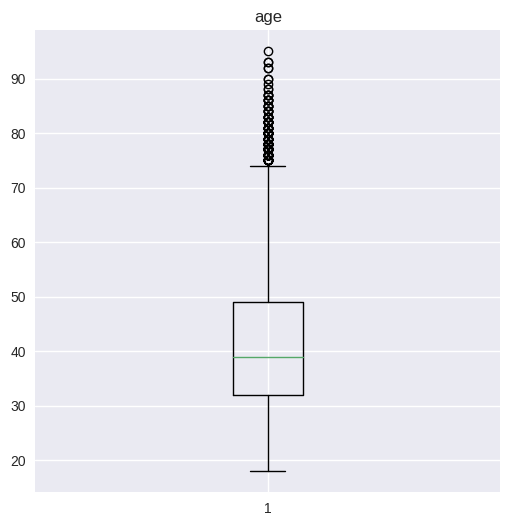

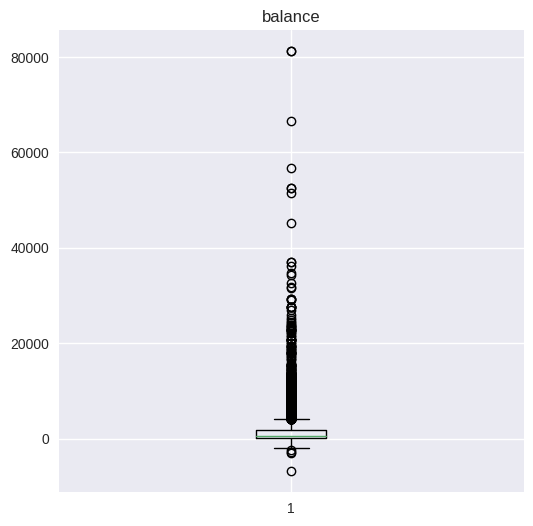

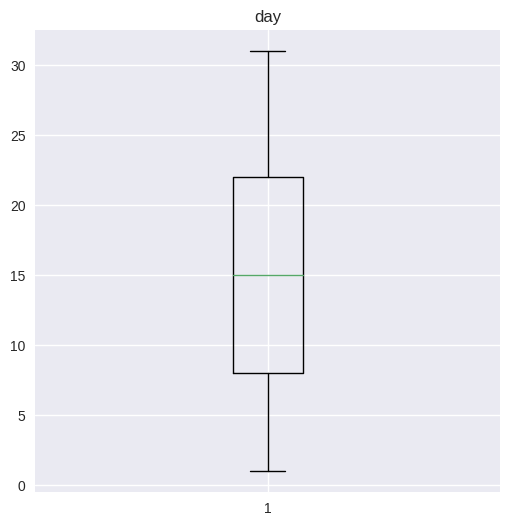

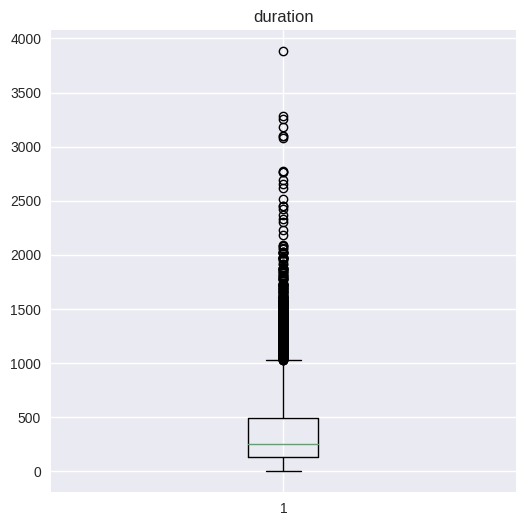

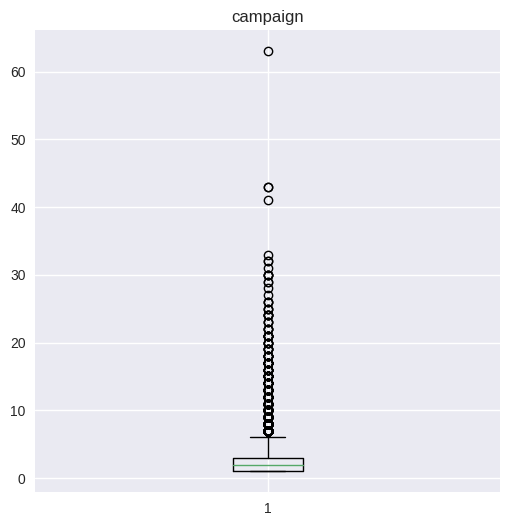

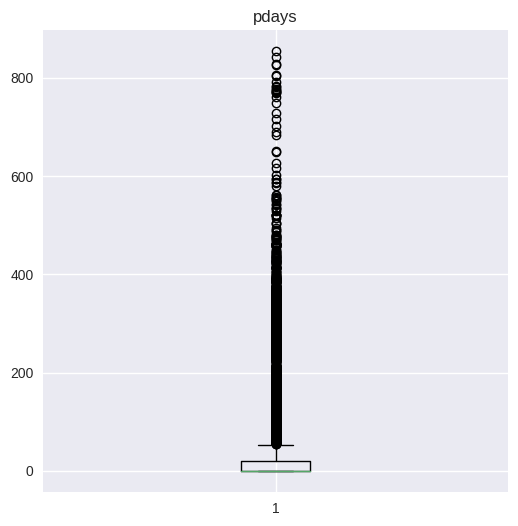

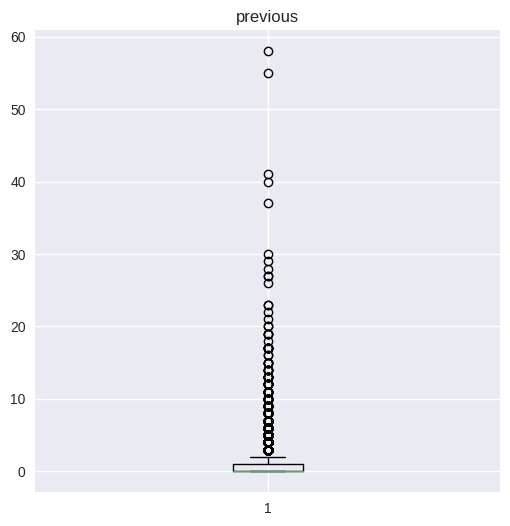

In [ ]:
numeric_cols = df.select_dtypes(include=[int, float])

for col in numeric_cols:
    plt.figure(figsize=(6, 6))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Statistics for column job:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
Mode: management
Number of unique values: 12
Unique values: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']



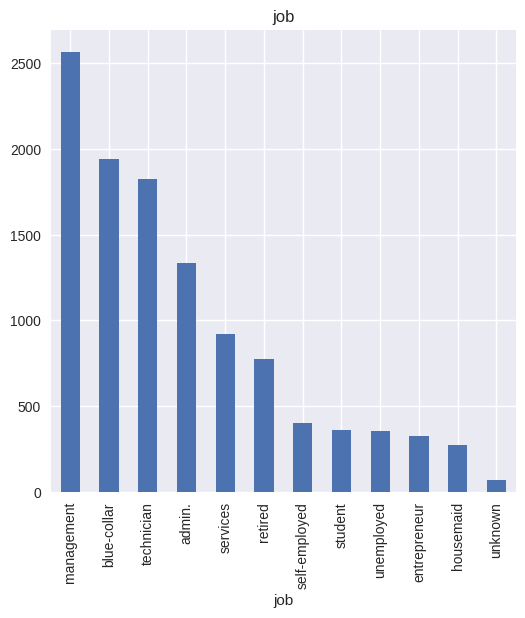

Statistics for column marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
Mode: married
Number of unique values: 3
Unique values: ['married' 'single' 'divorced']



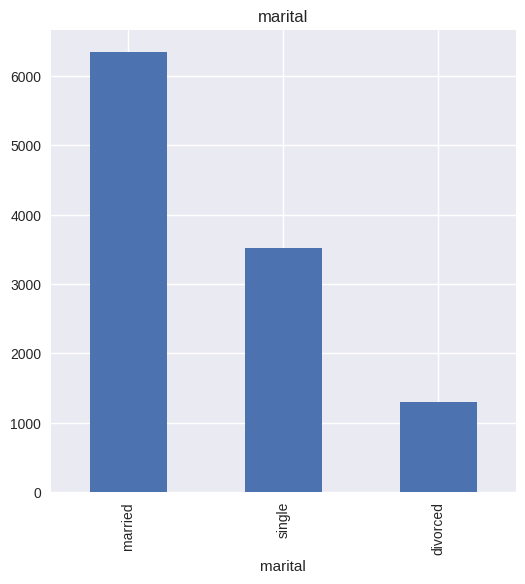

Statistics for column education:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
Mode: secondary
Number of unique values: 4
Unique values: ['secondary' 'tertiary' 'primary' 'unknown']



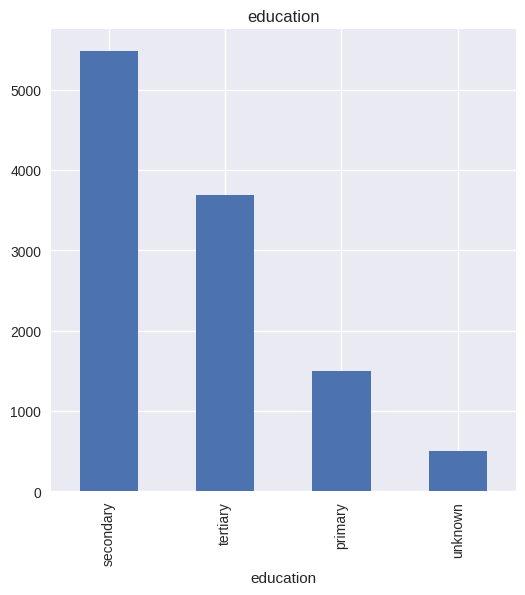

Statistics for column default:
default
no     10994
yes      168
Name: count, dtype: int64
Mode: no
Number of unique values: 2
Unique values: ['no' 'yes']



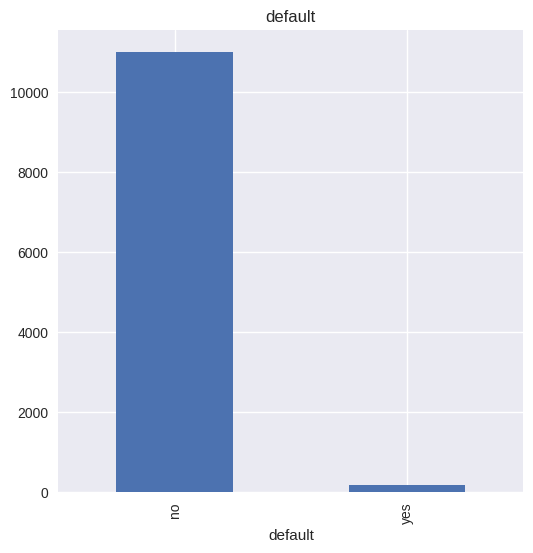

Statistics for column housing:
housing
no     5881
yes    5281
Name: count, dtype: int64
Mode: no
Number of unique values: 2
Unique values: ['yes' 'no']



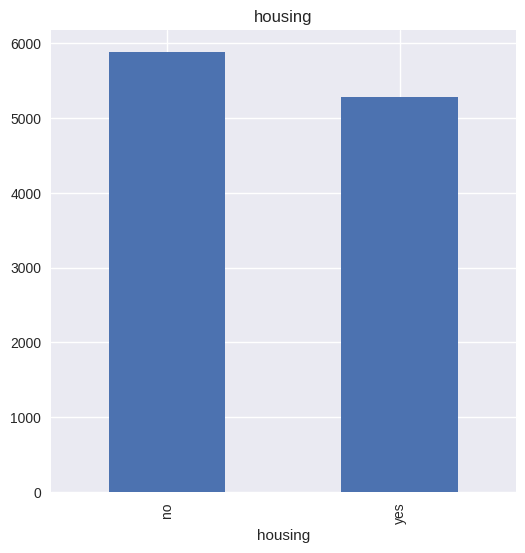

Statistics for column loan:
loan
no     9702
yes    1460
Name: count, dtype: int64
Mode: no
Number of unique values: 2
Unique values: ['no' 'yes']



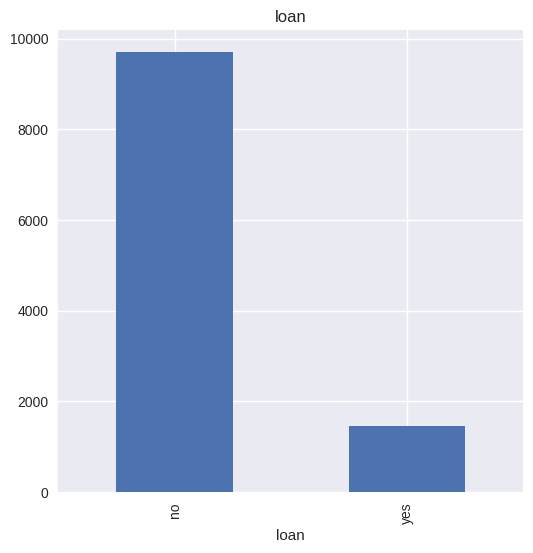

Statistics for column contact:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
Mode: cellular
Number of unique values: 3
Unique values: ['unknown' 'cellular' 'telephone']



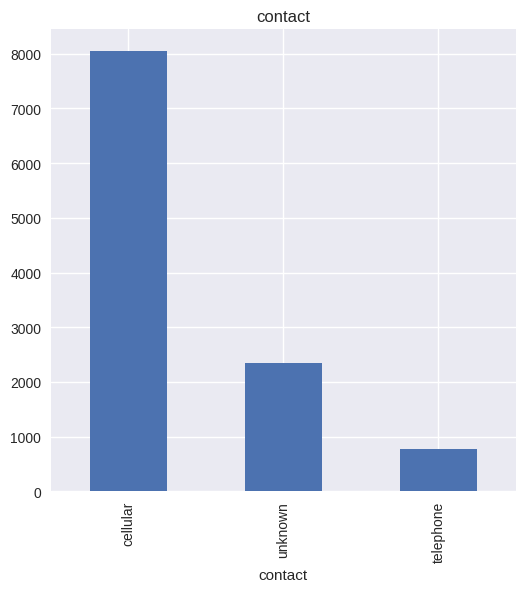

Statistics for column month:
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
Mode: may
Number of unique values: 12
Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']



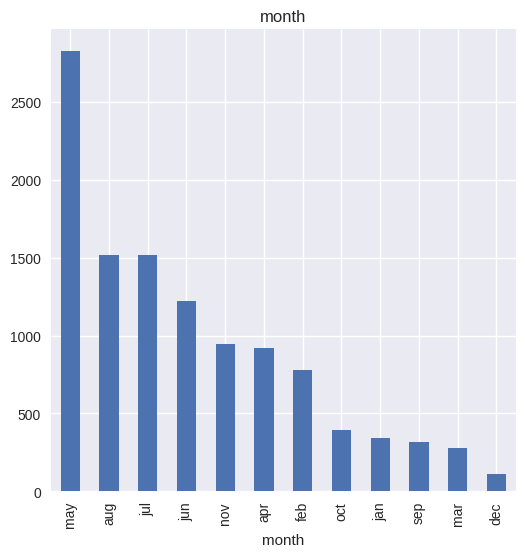

Statistics for column poutcome:
poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64
Mode: unknown
Number of unique values: 4
Unique values: ['unknown' 'other' 'failure' 'success']



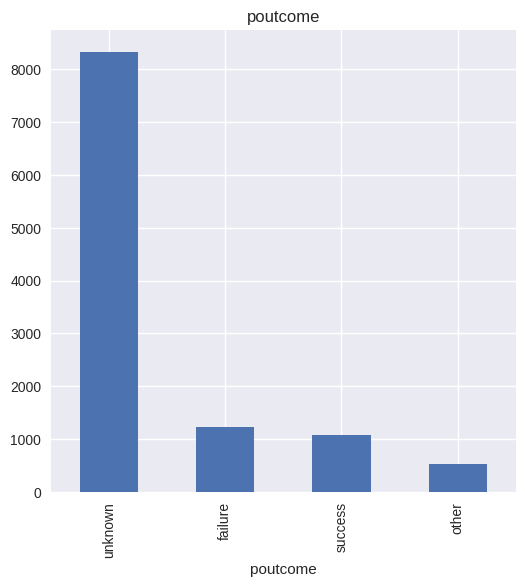

Statistics for column deposit:
deposit
no     5873
yes    5289
Name: count, dtype: int64
Mode: no
Number of unique values: 2
Unique values: ['yes' 'no']



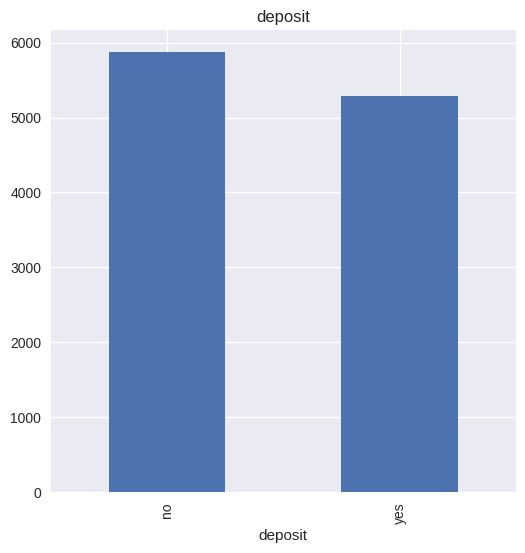

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


non_numeric_cols = df.select_dtypes(exclude=[int, float])

for col in non_numeric_cols:
    print(f"Statistics for column {col}:")
    print(df[col].value_counts())
    print(f"Mode: {df[col].mode().values[0]}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")
    print()

    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()



### Observation
From an occupational perspective, there is a good diversity of jobs, with management and technology fields having the highest representation among individuals. Additionally, the majority of individuals selected for the campaign are married and have at least a high school education. The target column also shows a good diversity between the two labels.

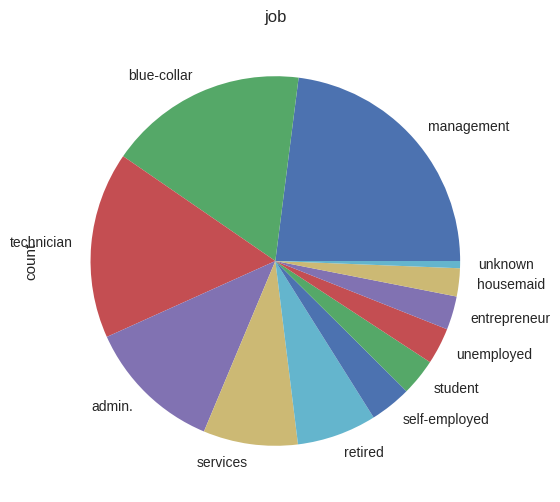

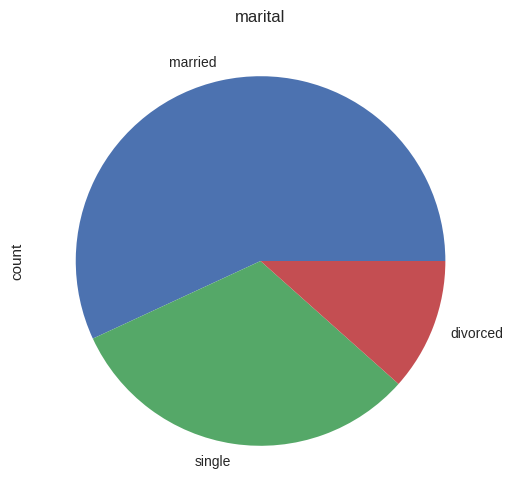

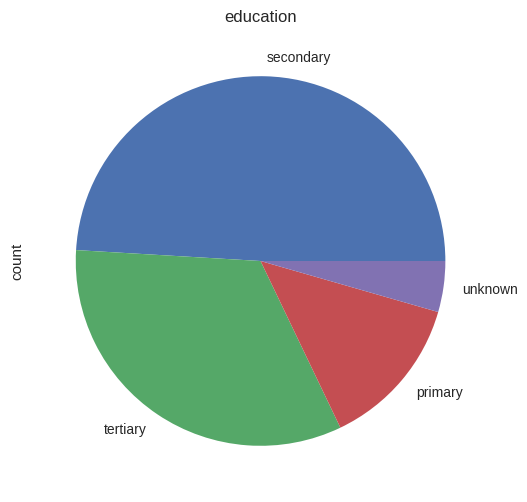

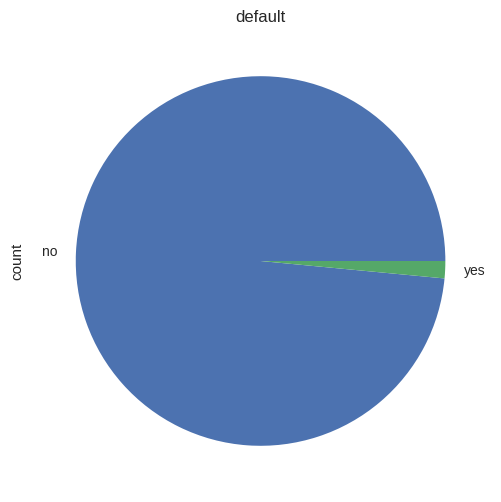

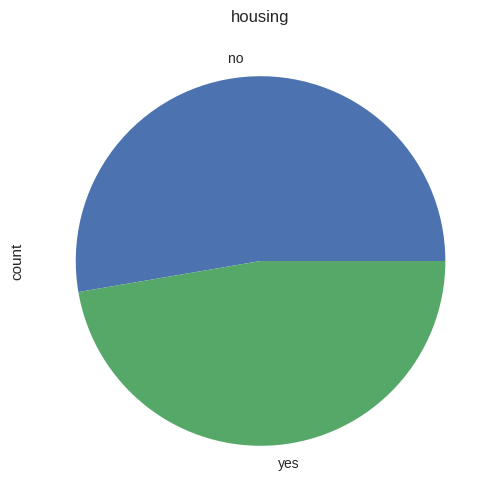

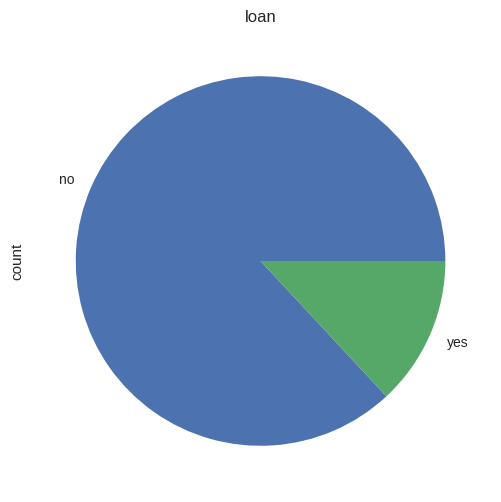

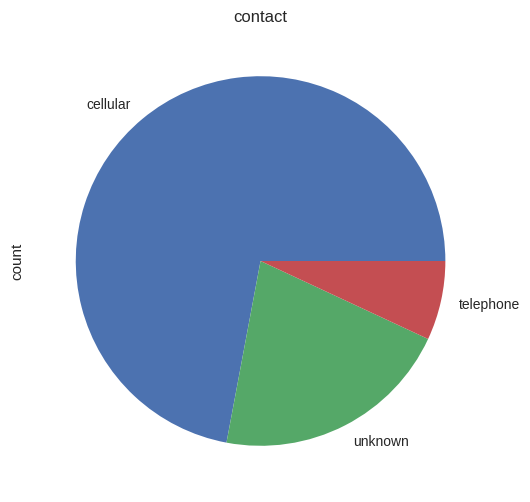

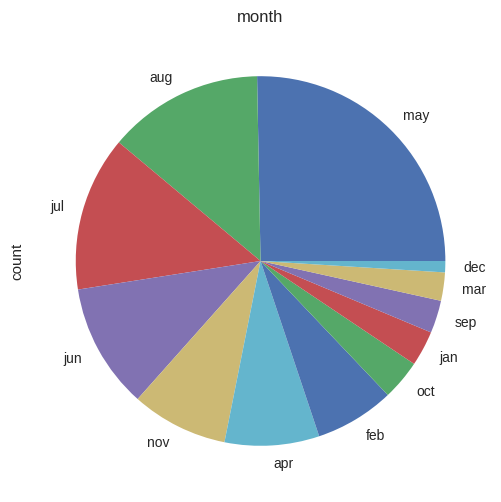

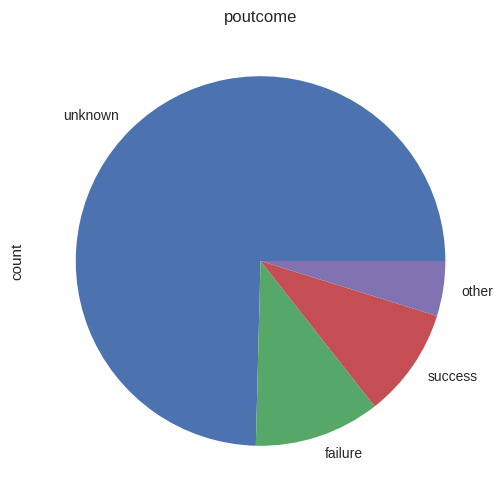

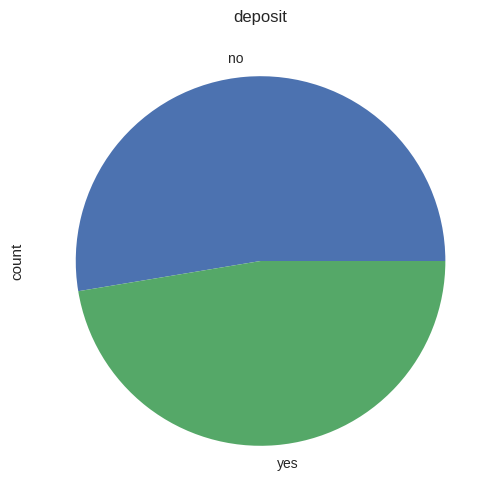

In [ ]:
for col in non_numeric_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie')
    plt.title(col)
    plt.show()